<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/cluster_jerarquico2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [4]:
X = np.array(dataframe[["op", "ex", "ag"]])

In [5]:
# Realizamos el análisis jerárquico
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [7]:
# Graficamos los resultados en 3D
fig = plt.figure()
ax = Axes3D(fig)
colores = ['red', 'green', 'blue', 'cyan', 'yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

plt.show()

<Figure size 1600x900 with 0 Axes>

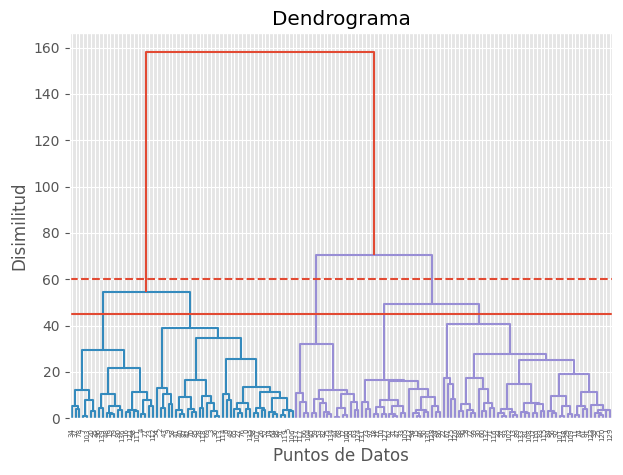

In [45]:
# Graficamos el dendrograma
linked = linkage(X, 'ward')
plt.figure(figsize=(7, 5))
dendrogram(linked, orientation='top')
plt.axhline(60,linestyle='--')
plt.axhline(45)
plt.title("Dendrograma")
plt.ylabel("Disimilitud")
plt.xlabel("Puntos de Datos")
plt.show()

In [9]:
# Contamos cuántos usuarios hay en cada grupo
copy = pd.DataFrame()
copy['usuario'] = dataframe['usuario'].values
copy['categoria'] = dataframe['categoria'].values
copy['label'] = labels
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
print(cantidadGrupo)

    color  cantidad
0     red        44
1   green        36
2    blue        17
3    cyan        22
4  yellow        21


In [10]:
# Imprimimos en pantalla los usuarios con categoría 2 del grupo
for index, row in copy.iterrows():
    if row["label"] == 2:
        print(row["usuario"], row["categoria"], row["label"])

aplusk 1 2
EmWatson 1 2
enrique305 2 2
foofighters 2 2
gwenstefani 2 2
HilaryDuff 2 2
IanMcKellen 1 2
JerrySeinfeld 1 2
JessieJ 2 2
JLo 2 2
JudgeJudy 4 2
MeganFox516 1 2
OfficialAdele 2 2
rihanna 2 2
springsteen 2 2
victoriabeckham 3 2
xoellopez 2 2


In [11]:
# Vemos el representante del grupo, el usuario cercano a su centroide
closest, _ = pairwise_distances_argmin_min(np.array([np.mean(X[labels == i], axis=0) for i in range(5)]), X)
users = dataframe['usuario'].values
for row in closest:
    print(users[row])


SJP
David_Busta
JudgeJudy
DaniMateoAgain
AngelAlessandra


In [12]:
# Miramos los usuarios del grupo 3
for index, row in copy.iterrows():
    if row["label"] == 3:
        print(row["usuario"], row["categoria"], row["label"])

alfredocasero1 4 3
andykusnetzoff 5 3
Berto_Romero 4 3
Buenafuente 4 3
CarlosAuryn 2 3
CasillasWorld 7 3
CristiPedroche 4 3
DaniMateoAgain 5 3
davidbisbal 2 3
eva_hache 1 3
jordievole 4 3
jordiGlez 4 3
josjaviersantos 9 3
JPVarsky 5 3
manuginobili 7 3
maria_patino 4 3
NadalMiki 4 3
perezreverte 9 3
pnique 8 3
SerranoIsmael 2 3
XaviRodriguez 4 3
_josecoronado_ 1 3


In [16]:
X

array([[34.297953, 41.948819, 29.370315],
       [44.986842, 37.938947, 24.279098],
       [41.733854, 38.999896, 34.645521],
       [40.377154, 52.337538, 31.082154],
       [36.664677, 48.530806, 31.138871],
       [33.531771, 43.211667, 25.786667],
       [31.851102, 47.182362, 19.594331],
       [31.865118, 55.377559, 36.258346],
       [46.393488, 39.93031 , 16.658062],
       [39.436667, 32.966288, 32.291591],
       [52.750992, 41.698855, 17.057176],
       [41.328182, 39.173333, 21.070505],
       [54.407727, 34.104318, 18.771818],
       [47.610076, 39.439545, 21.438409],
       [39.435149, 41.479403, 21.004104],
       [48.617348, 43.617955, 19.263258],
       [40.073543, 44.194724, 33.921417],
       [43.37292 , 43.792263, 21.067737],
       [49.792403, 41.435581, 16.433953],
       [30.020465, 44.29969 , 39.117984],
       [36.909459, 51.947297, 34.687568],
       [50.594462, 41.383154, 17.896538],
       [34.186667, 18.693542,  9.682292],
       [31.215455, 44.180909, 32.8

In [43]:
Xp = [[34.297953], [41.948819], [29.370315],
      [34.297953], [41.948819], [29.370315]]
new_labels = hc.fit_predict(Xp)
print(new_labels)



[0 4 3 0 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
